In [1]:
import altair as alt
from vega_datasets import data
import pandas as pd
import numpy as np
from unidecode import unidecode

In [2]:
states = alt.topo_feature(data.world_110m.url, feature='countries')

In [3]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [4]:
def standard_names(x):
    s = unidecode(x.replace(" ","").lower())
    if s=="bogotad.c.":
        return "bogota"
    return s

In [5]:
df_cities = pd.read_csv('../../data/worldcitiespop.csv', encoding='latin-1', names=['co','name','reg_name','code','pop','lat','lon'])

/Users/jfm/col_datos/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df_cities.head()

co        name    reg_name code  pop        lat       lon
0  ad       aixas       Aixàs   06  NaN  42.483333  1.466667
1  ad  aixirivali  Aixirivali   06  NaN  42.466667  1.500000
2  ad  aixirivall  Aixirivall   06  NaN  42.466667  1.500000
3  ad   aixirvall   Aixirvall   06  NaN  42.466667  1.500000
4  ad    aixovall    Aixovall   06  NaN  42.466667  1.483333

In [7]:
df_cities_col = df_cities.loc[df_cities["co"]=="co"]

In [8]:
df_cities_col = df_cities_col.loc[df_cities_col["lon"] < -60]

In [9]:
df_cities_col["std_name"] = df_cities_col["name"].apply(standard_names)

In [10]:
df_cities_col.loc[df_cities_col["std_name"].apply(lambda x:"caguan" in x)]

co                      name                  reg_name code  pop  \
481508  co                    caguan                    Caguán   16  NaN   
482877  co          caserio macaguan          Caserio Macaguán    3  NaN   
494627  co     laso policia macaguan     Laso Policia Macaguán    3  NaN   
496206  co                 macaguana                 Macaguana    3  NaN   
496207  co                 macaguane                 Macaguane    3  NaN   
496208  co                  macaguan                  Macaguán    3  NaN   
502355  co     santa rosa del caguan     Santa Rosa del Caguán    8  NaN   
502488  co     san vicente de caguan     San Vicente de Caguán    8  NaN   
502490  co    san vicente del caguan    San Vicente del Caguán    8  NaN   
503700  co  tres esquinas del caguan  Tres Esquinas del Caguán    8  NaN   

             lat        lon               std_name  
481508  2.866667 -75.233333                 caguan  
482877  6.583333 -71.716667        caseriomacaguan  
494627  6.566667 -71.716667    lasopoliciamacaguan  
496206  6.583333 -71.716667              macaguana  
496207  6.583333 -71.716667              macaguane  
496208  6.583333 -71.716667               macaguan  
502355  1.734167 -74.784722     santarosadelcaguan  
502488  2.113889 -74.768889     sanvicentedecaguan  
502490  2.113889 -74.768889    sanvicentedelcaguan  
503700  1.868056 -74.813056  tresesquinasdelcaguan

In [11]:
df_cities_col.head()

co         name     reg_name code  pop        lat        lon  \
479291  co  20 de julio  20 de Julio   33  NaN   4.566667 -74.100000   
479292  co  20 de junio  20 de Junio   21  NaN   8.040556 -72.622500   
479293  co   4 esquinas   4 Esquinas   20  NaN   1.100000 -77.466667   
479294  co       abarca       Abarca   18  NaN  10.766667 -74.166667   
479295  co      abejero      Abejero   24  NaN   5.157500 -75.909444   

         std_name  
479291  20dejulio  
479292  20dejunio  
479293  4esquinas  
479294     abarca  
479295    abejero

In [12]:
#df_cities_col = df_cities_col.loc[~df_cities_col["pop"].isna()]
df_cities_col = df_cities_col.sort_values("pop")
df_cities_col = df_cities_col.loc[~df_cities_col["std_name"].duplicated()]

In [13]:
#http://www.centrodememoriahistorica.gov.co/micrositios/informeGeneral/basesDatos.html
#df_homicides = pd.read_excel("../../small_data/AsesinatosSelectivos1981-2012.xlsx")
#df_homicides.to_csv("../../small_data/AsesinatosSelectivos1981-2012.csv", index=False)
df_homicides = pd.read_csv("../../small_data/AsesinatosSelectivos1981-2012.csv")
print(len(df_homicides))

16347


In [14]:
df_homicides = df_homicides.dropna(subset=['Municipio'])

In [15]:
df_homicides["std_name"] = df_homicides["Municipio"].apply(standard_names)

In [16]:
df_homicides.head(2)

Día Mes     Año Departamento        Municipio Lugar de Ocurrencia  \
0   6   1  1981.0    Santander  Barrancabermeja                 NaN   
1   7   1  1981.0        Huila        Algeciras                 NaN   

          Tipo de Implicado (1)         Tipo de Implicado (2) Nº Víctimas  \
0  Grupo Armado No Identificado  Grupo Armado No Identificado           1   
1          Grupos Paramilitares          Grupos Paramilitares           2   

                                              Fuente Unnamed: 10  \
0  Itinerario de la Represión Oficial y Militar e...         NaN   
1  Itinerario de la Represión Oficial y Militar e...         NaN   

          std_name  
0  barrancabermeja  
1        algeciras

In [17]:
len(df_homicides)

16279

In [18]:
df_homicides["std_name"].loc[~df_homicides["std_name"].isin(df_cities_col["std_name"])].value_counts()

zonabananera                  55
patia(elbordo)                42
puertolibertador              33
elcarmendechucuri             31
elcarmendeatrato              22
lapaz(robles)                 17
medioatrato                   16
elcarmendeldarien             13
santiagodetolu                12
laapartada                    10
exterior                      10
girardota                     10
sanandresdecuerquia            8
santaelenadelopon              8
sanpedrodelosmilagros          6
solita                         4
josedeocune                    2
belendebajira                  2
ellitoraldelsanjuan            2
sabanasdesanangel              2
zapayan                        1
valleguamuez-lahormiga         1
mediosanjuan                   1
medellinybello                 1
provinciadeldarien             1
estadodeapure-paez             1
yarumalyangostura              1
cachinay                       1
lopezdemicay                   1
rioquito                       1
venadilloy

In [19]:
dict_conv = {
    'Grupo Armado No Identificado':'Desconocidos', 
    'Grupos Paramilitares':'Grupos Paramilitares',
    'Fuerza Pública':'Fuerza Pública', 
    'Desconocidos':'Desconocidos', 
    ' Grupos Paramilitares':'Grupos Paramilitares',
    'Guerrilla  ':'Guerrillas', 
    'Fuerza Pública-Grupos Paramilitares':'Fuerza Pública', 
    'Guerrilla':'Guerrillas',
    'Otros Grupos Armados':'Otros', 
    'Guerrilla-ELN':'Guerrillas'
}

In [20]:
df_homicides["Actor responsable"] = df_homicides["Tipo de Implicado (1)"].apply(lambda x:dict_conv[x])

In [21]:
df = pd.merge(df_homicides, df_cities_col, on="std_name", how="inner")[["Actor responsable","lat","lon","std_name"]]

In [22]:
df

Actor responsable       lat        lon          std_name
0              Desconocidos  7.065278 -73.854722   barrancabermeja
1            Fuerza Pública  7.065278 -73.854722   barrancabermeja
2            Fuerza Pública  7.065278 -73.854722   barrancabermeja
3      Grupos Paramilitares  7.065278 -73.854722   barrancabermeja
4      Grupos Paramilitares  7.065278 -73.854722   barrancabermeja
...                     ...       ...        ...               ...
15945  Grupos Paramilitares  2.101944 -78.721667  franciscopizarro
15946  Grupos Paramilitares  2.101944 -78.721667  franciscopizarro
15947          Desconocidos  3.518889 -75.718889           lauribe
15948            Guerrillas  3.518889 -75.718889           lauribe
15949          Desconocidos  1.515556 -77.495000          losandes

[15950 rows x 4 columns]

In [23]:
df_for_painting = df.copy()

In [24]:
min_lat = df_for_painting["lat"].min()
max_lat = df_for_painting["lat"].max()
min_lon = df_for_painting["lon"].min()
max_lon = df_for_painting["lon"].max()
r_lat = max_lat - min_lat
r_lon = max_lon - min_lon

In [25]:
jitter_factor = 0.15

In [26]:
lat_jitter = lambda x:x + r_lat*(0.5 - np.random.random())*jitter_factor

In [27]:
lon_jitter = lambda x:x + r_lon*(0.5 - np.random.random())*jitter_factor

In [28]:
df_for_painting["lon"] = df_for_painting["lon"].apply(lon_jitter)

In [29]:
df_for_painting["lat"] = df_for_painting["lat"].apply(lat_jitter)

In [30]:
df_for_painting["Actor responsable"].value_counts()

Grupos Paramilitares    5895
Desconocidos            5769
Guerrillas              2675
Fuerza Pública          1605
Otros                      6
Name: Actor responsable, dtype: int64

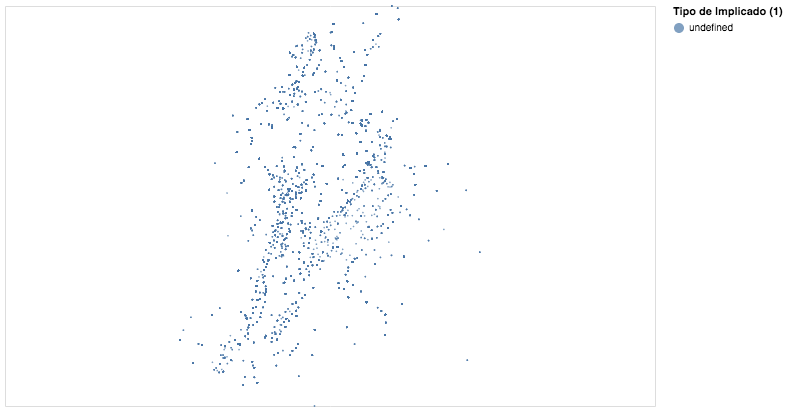

In [31]:
# Since the data is more than 5,000 rows we'll import it from a URL
source = data.zipcodes.url

alt.Chart(df).transform_calculate(
    "leading digit", alt.expr.substring(alt.datum.zip_code, 0, 1)
).mark_circle(size=3).encode(
    longitude='lon:Q',
    latitude='lat:Q',
    color='Tipo de Implicado (1):N',
    tooltip='std_name:N'
).properties(
    width=650,
    height=400
)

In [57]:
# Since the data is more than 5,000 rows we'll import it from a URL
source = data.zipcodes.url

points = alt.Chart(df_for_painting).transform_calculate(
    "leading digit", alt.expr.substring(alt.datum.zip_code, 0, 1)
).mark_circle(size=3).encode(
    longitude='lon:Q',
    latitude='lat:Q',
    color=alt.Color('Actor responsable:N',
                    scale=alt.Scale(
                        domain=[
                            'Desconocidos',
                            'Grupos Paramilitares',
                            'Fuerza Pública',
                            'Guerrillas',
                            'Otros'
                        ],
                        range=['#71ff64',
                               '#0087FF',
                               '#F700FF',
                               '#FF7800',
                               '#08FF00'
                              ]
                    )
                   ),
    tooltip='std_name:N'
).properties(
    width=650,
    height=400
).project(
    'mercator',
    scale=1000,
    center=[-74,5]
)

In [60]:
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300,
    title='Asesinatos selectivos en Colombia 1981-2012 - Centro de Memoria Histórica'
).project(
    'mercator',
    scale=1000,
    center=[-74,5]
)

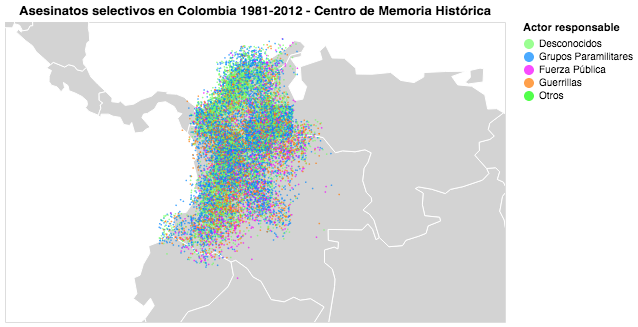

In [61]:
background + points

In [35]:
# Since the data is more than 5,000 rows we'll import it from a URL
source = data.zipcodes.url

points = alt.Chart(df_for_painting.loc[df_for_painting["Actor responsable"] != "Desconocidos"]).transform_calculate(
    "leading digit", alt.expr.substring(alt.datum.zip_code, 0, 1)
).mark_circle(size=3).encode(
    longitude='lon:Q',
    latitude='lat:Q',
    color='Actor responsable:N',
    tooltip='std_name:N'
).properties(
    width=650,
    height=400
).project(
    'mercator',
    scale=1000,
    center=[-80,5]
)

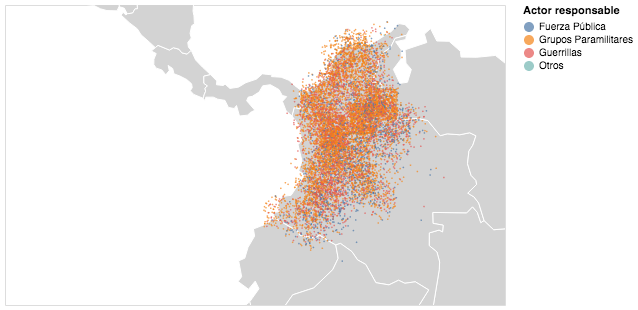

In [36]:
background + points

In [37]:
# Since the data is more than 5,000 rows we'll import it from a URL
source = data.zipcodes.url

points = alt.Chart(df_for_painting.loc[df_for_painting["Actor responsable"] == "Grupos Paramilitares"]).transform_calculate(
    "leading digit", alt.expr.substring(alt.datum.zip_code, 0, 1)
).mark_circle(size=3).encode(
    longitude='lon:Q',
    latitude='lat:Q',
    color='Actor responsable:N',
    tooltip='std_name:N'
).properties(
    width=650,
    height=400
).project(
    'mercator',
    scale=1000,
    center=[-80,5]
)

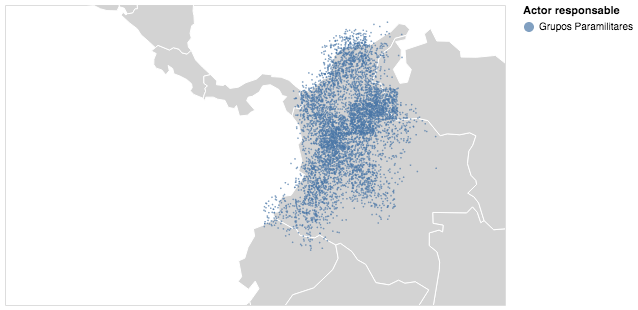

In [38]:
background + points

In [39]:
# Since the data is more than 5,000 rows we'll import it from a URL
source = data.zipcodes.url

points = alt.Chart(df_for_painting.loc[df_for_painting["Actor responsable"] == "Fuerza Pública"]).transform_calculate(
    "leading digit", alt.expr.substring(alt.datum.zip_code, 0, 1)
).mark_circle(size=3).encode(
    longitude='lon:Q',
    latitude='lat:Q',
    color='Actor responsable:N',
    tooltip='std_name:N'
).properties(
    width=650,
    height=400
).project(
    'mercator',
    scale=1000,
    center=[-80,5]
)

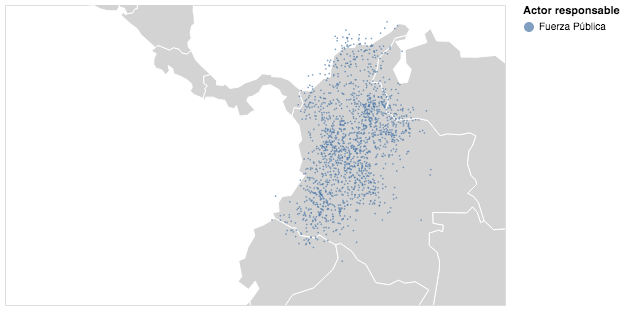

In [40]:
background + points

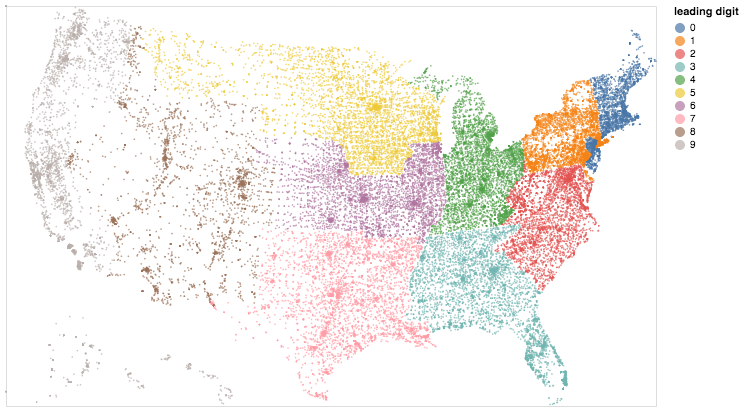

In [41]:

# Since the data is more than 5,000 rows we'll import it from a URL
source = data.zipcodes.url

alt.Chart(source).transform_calculate(
    "leading digit", alt.expr.substring(alt.datum.zip_code, 0, 1)
).mark_circle(size=3).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='leading digit:N',
    tooltip='zip_code:N'
).project(
    type='albersUsa'
).properties(
    width=650,
    height=400
)